# How this method works
- A structured note is a custom investment product that mixes a safe return with market exposure.
- It always pays a fixed return (e.g., 2%) — like a savings account.
- If the coffee price rises, the investor also earns a percentage of the gain.
- If prices don’t rise, the investor still keeps the fixed return.
- This limits losses, offering some protection against price drops.
- We model this using Monte Carlo simulation to see many possible outcomes.
- Each simulation gives a different future coffee price after 1 year.
- We calculate what the investor would earn in each case.
- Then we average all the outcomes and discount them to today’s value.
- This tells us the fair price and return distribution of the structured note.



Estimated Price of the Structured Note: $0.0849
95% CI of Simulated Payoffs: [0.0200, 0.3919]


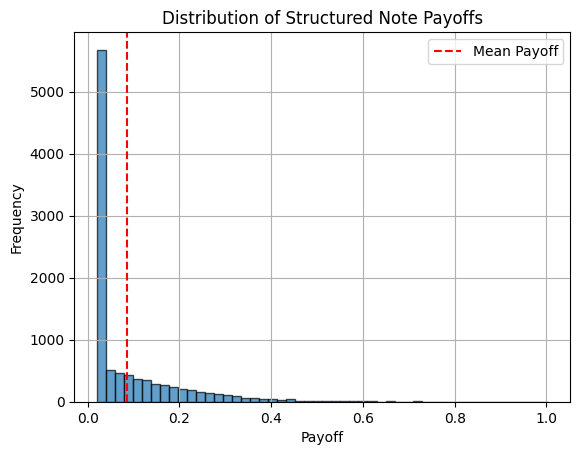

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 200                 # Initial coffee price
K = 200                  # Strike price (threshold)
r = 0.02                 # Risk-free interest rate
sigma = 0.25             # Volatility of coffee
T = 1.0                  # Time to maturity (1 year)
alpha = 0.6              # Participation rate
fixed_coupon = 0.02      # Fixed part of return (2%)
n_simulations = 10000    # Monte Carlo paths
np.random.seed(42)       # For reproducibility

# Step 1: Simulate end-of-period coffee prices using Geometric Brownian Motion
Z = np.random.normal(0, 1, n_simulations)
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * Z)

# Step 2: Calculate payoff of structured note
# Fixed coupon + α * max(ST - K, 0) / S0 (normalized excess return)
payoffs = fixed_coupon + alpha * np.maximum(ST - K, 0) / S0

# Step 3: Discount back to present value
discounted_payoffs = np.exp(-r * T) * payoffs
note_price = np.mean(discounted_payoffs)

# Step 4: Plot and summary
print(f"Estimated Price of the Structured Note: ${note_price:.4f}")
print(f"95% CI of Simulated Payoffs: [{np.percentile(payoffs, 2.5):.4f}, {np.percentile(payoffs, 97.5):.4f}]")

# Histogram of payoffs
plt.hist(payoffs, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(np.mean(payoffs), color='red', linestyle='dashed', label='Mean Payoff')
plt.title("Distribution of Structured Note Payoffs")
plt.xlabel("Payoff")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


# ETF (Scenario 4 – Diversification Seeker)
- An ETF is a fund that copies the price of a commodity — like coffee.
- When coffee prices go up, the ETF price goes up too (and vice versa).
- It’s simple — buy one share and you get exposure to coffee markets.
- We simulate coffee prices using the same method (random price paths).
- Then we add a tiny bit of noise to simulate real-world tracking error.
- The ETF return is almost the same as the actual coffee return.
- It can go both up and down, with no fixed or protected return.
- There’s no customization — it gives full market exposure.
- We measure how closely it tracks coffee and how risky it is.
- This helps investors who want easy and low-cost access to coffee prices.

📊 ETF Performance
Mean Return: 0.0200
Std Dev (Risk): 0.2602
Tracking Error vs Coffee: 0.0100

💰 Structured Note Performance
Mean Return: 0.0866
Std Dev (Risk): 0.1082


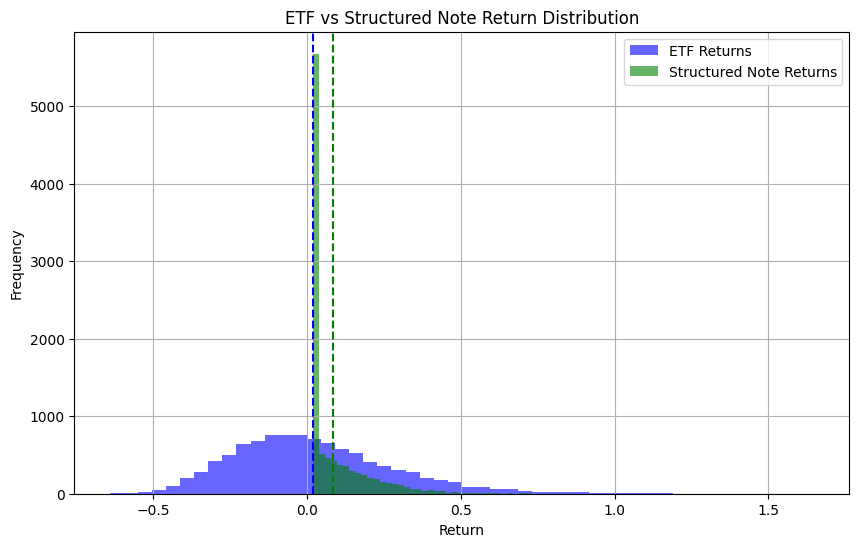

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Reuse previous parameters
S0 = 200
r = 0.02
sigma = 0.25
T = 1.0
n_simulations = 10000
np.random.seed(42)

# Simulate final coffee prices again
Z = np.random.normal(0, 1, n_simulations)
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * Z)
coffee_returns = (ST - S0) / S0

# Simulate ETF returns with small tracking error
tracking_error_std = 0.01  # 1% tracking error
etf_returns = coffee_returns + np.random.normal(0, tracking_error_std, n_simulations)

# Structured note payoff (from previous task)
alpha = 0.6
fixed_coupon = 0.02
structured_note_returns = fixed_coupon + alpha * np.maximum(ST - S0, 0) / S0

# Compare Results
print("📊 ETF Performance")
print(f"Mean Return: {np.mean(etf_returns):.4f}")
print(f"Std Dev (Risk): {np.std(etf_returns):.4f}")
print(f"Tracking Error vs Coffee: {np.std(etf_returns - coffee_returns):.4f}\n")

print("💰 Structured Note Performance")
print(f"Mean Return: {np.mean(structured_note_returns):.4f}")
print(f"Std Dev (Risk): {np.std(structured_note_returns):.4f}")

# Plot comparison
plt.figure(figsize=(10, 6))
plt.hist(etf_returns, bins=50, alpha=0.6, label='ETF Returns', color='blue')
plt.hist(structured_note_returns, bins=50, alpha=0.6, label='Structured Note Returns', color='green')
plt.axvline(np.mean(etf_returns), color='blue', linestyle='dashed')
plt.axvline(np.mean(structured_note_returns), color='green', linestyle='dashed')
plt.title("ETF vs Structured Note Return Distribution")
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


- ETF gives full exposure to coffee, but with higher volatility.
- Structured note offers downside protection and moderate upside, ideal for a moderate-risk investor.
- You can now use this to advise clients based on their risk tolerance and preference.